In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/brianoktavec/MSC550/Assignment_3/Auto-1_updated.csv')

In [5]:
import statsmodels.api as sm
ols = sm.OLS(df['mpg'], sm.add_constant(df.iloc[:, 1:5]))
lm = ols.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.30e-93
Time:                        22:22:43   Log-Likelihood:                -1139.6
No. Observations:                 392   AIC:                             2289.
Df Residuals:                     387   BIC:                             2309.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           48.0213      2.787     17.232   

In [3]:
# 1

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,acceleration,weight,name
0,18.0,8,307.0,130,12.0,3504,chevrolet chevelle malibu
1,15.0,8,350.0,165,11.5,3693,buick skylark 320
2,18.0,8,318.0,150,11.0,3436,plymouth satellite
3,16.0,8,304.0,150,12.0,3433,amc rebel sst
4,17.0,8,302.0,140,10.5,3449,ford torino


In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
cylinders = poly.fit_transform(df.iloc[:,1:2])
cylinders = pd.DataFrame(cylinders[:,1:], columns = ['cylinders_1','cylinders_2'])
displacement = poly.fit_transform(df.iloc[:,2:3])
displacement = pd.DataFrame(displacement[:,1:], columns = ['displacement_1','displacement_2'])
horsepower = poly.fit_transform(df.iloc[:,3:4])
horsepower = pd.DataFrame(horsepower[:,1:], columns = ['horsepower_1','horsepower_2'])
acceleration = poly.fit_transform(df.iloc[:,4:5])
acceleration = pd.DataFrame(acceleration[:,1:], columns = ['acceleration_1','acceleration_2'])


df_squared = pd.concat([cylinders, displacement, horsepower, acceleration, df.iloc[:,5:]], axis=1)
df_squared

,cylinders_1,cylinders_2,displacement_1,displacement_2,horsepower_1,horsepower_2,acceleration_1,acceleration_2,weight,name
0,8.0,64.0,307.0,94249.0,130.0,16900.0,12.0,144.00,3504,chevrolet chevelle malibu
1,8.0,64.0,350.0,122500.0,165.0,27225.0,11.5,132.25,3693,buick skylark 320
2,8.0,64.0,318.0,101124.0,150.0,22500.0,11.0,121.00,3436,plymouth satellite
3,8.0,64.0,304.0,92416.0,150.0,22500.0,12.0,144.00,3433,amc rebel sst
4,8.0,64.0,302.0,91204.0,140.0,19600.0,10.5,110.25,3449,ford torino
...,...,...,...,...,...,...,...,...,...,...
387,4.0,16.0,140.0,19600.0,86.0,7396.0,15.6,243.36,2790,ford mustang gl
388,4.0,16.0,97.0,9409.0,52.0,2704.0,24.6,605.16,2130,vw pickup
389,4.0,16.0,135.0,18225.0,84.0,7056.0,11.6,134.56,2295,dodge rampage
390,4.0,16.0,120.0,14400.0,79.0,6241.0,18.6,345.96,2625,ford ranger


In [9]:
import statsmodels.api as sm
ols = sm.OLS(df['mpg'], sm.add_constant(df_squared.iloc[:, 0:9]))
lm = ols.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          3.14e-113
Time:                        22:23:19   Log-Likelihood:                -1079.9
No. Observations:                 392   AIC:                             2180.
Df Residuals:                     382   BIC:                             2220.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             72.9759      7.579      9.

Text(0, 0.5, 'Residuals')

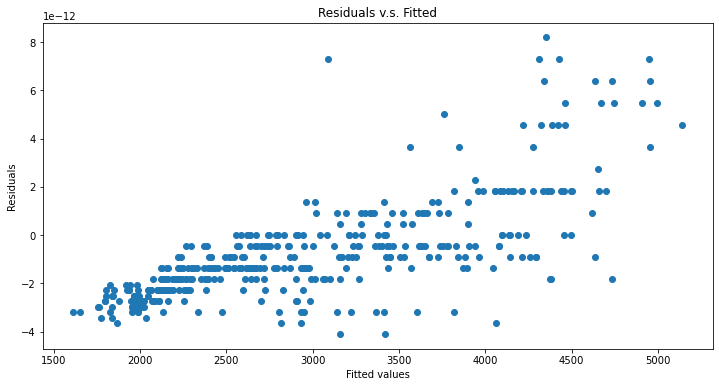

In [7]:
fitted_y = lm.fittedvalues
residual = lm.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title('Residuals v.s. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

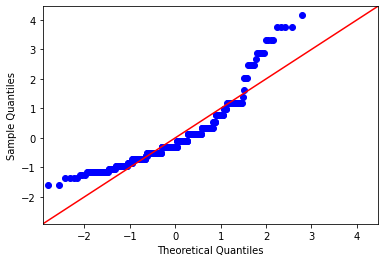

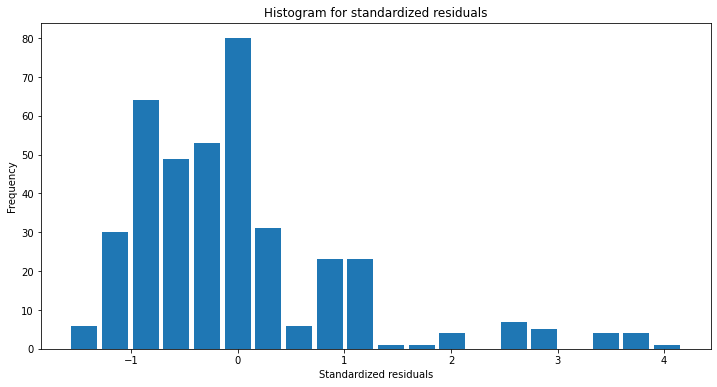

In [8]:
from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

In [53]:
# 2

In [52]:
cylinders = np.log(df.iloc[:,1:2])
cylinders = cylinders.rename(columns={"cylinders": "Log_cylinders"})
displacement = np.log(df.iloc[:,2:3])
displacement = displacement.rename(columns={"displacement": "Log_displacement"})
horsepower = np.log(df.iloc[:,3:4])
horsepower = horsepower.rename(columns={"horsepower": "Log_horsepower"})
acceleration = np.log(df.iloc[:,4:5])
acceleration = accerleration.rename(columns={"acceleration": "Log_acceleration"})

data_log = pd.concat([cylinders, displacement, horsepower, acceleration, df.iloc[:,5:]], axis=1)
data_log

,Log_cylinders,Log_displacement,Log_horsepower,Log_acceleration,weight,name
0,2.079442,5.726848,4.867534,2.484907,3504,chevrolet chevelle malibu
1,2.079442,5.857933,5.105945,2.442347,3693,buick skylark 320
2,2.079442,5.762051,5.010635,2.397895,3436,plymouth satellite
3,2.079442,5.717028,5.010635,2.484907,3433,amc rebel sst
4,2.079442,5.710427,4.941642,2.351375,3449,ford torino
...,...,...,...,...,...,...
387,1.386294,4.941642,4.454347,2.747271,2790,ford mustang gl
388,1.386294,4.574711,3.951244,3.202746,2130,vw pickup
389,1.386294,4.905275,4.430817,2.451005,2295,dodge rampage
390,1.386294,4.787492,4.369448,2.923162,2625,ford ranger


Text(0.5, 1.0, 'weight')

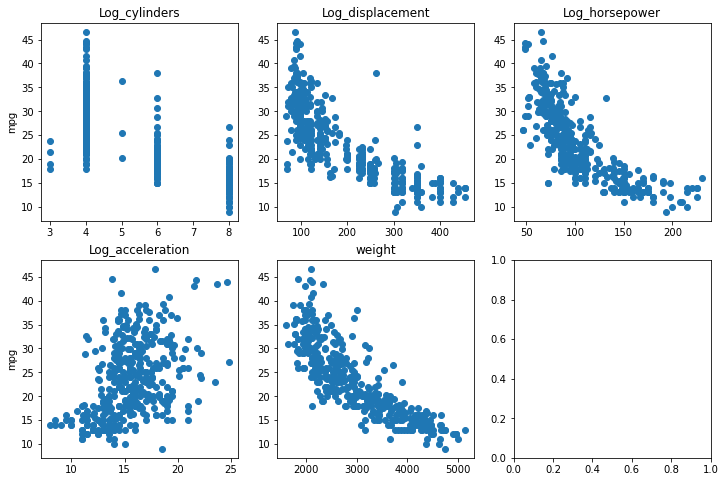

In [95]:
figure, axis = plt.subplots(2, 3, figsize=(12, 8))
data_log = data
axis[0,0].scatter(data_log.cylinders, df.mpg)
axis[0,0].set_title("Log_cylinders")
axis[0,0].set_ylabel('mpg')
axis[0,1].scatter(data_log.displacement,df.mpg)
axis[0,1].set_title("Log_displacement")
axis[0,2].scatter(data_log.horsepower,df.mpg)
axis[0,2].set_title("Log_horsepower")
axis[1,0].scatter(data_log.acceleration, df.mpg)
axis[1,0].set_title("Log_acceleration")
axis[1,0].set_ylabel('mpg')
axis[1,1].scatter(data_log.weight,df.mpg)
axis[1,1].set_title("weight")

In [56]:
ols = sm.OLS(df.mpg, sm.add_constant(data_log.iloc[:, 1:6]))
lm1 = ols.fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          9.82e-101
Time:                        20:15:43   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2643      2.669     17.331   

Text(0, 0.5, 'Residuals')

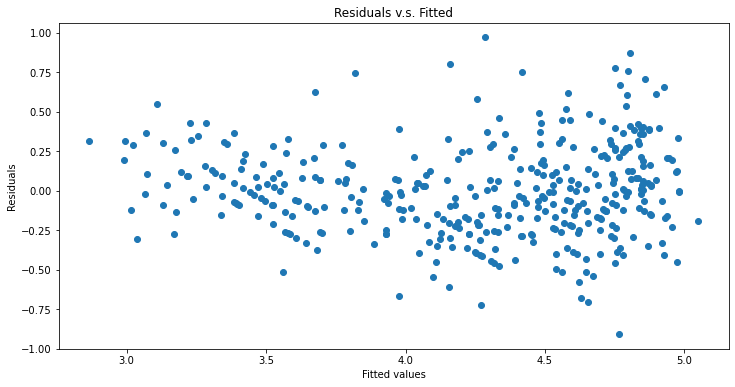

In [83]:
fitted_y = lm1.fittedvalues
residual = lm1.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title('Residuals v.s. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

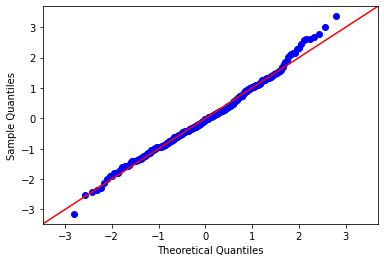

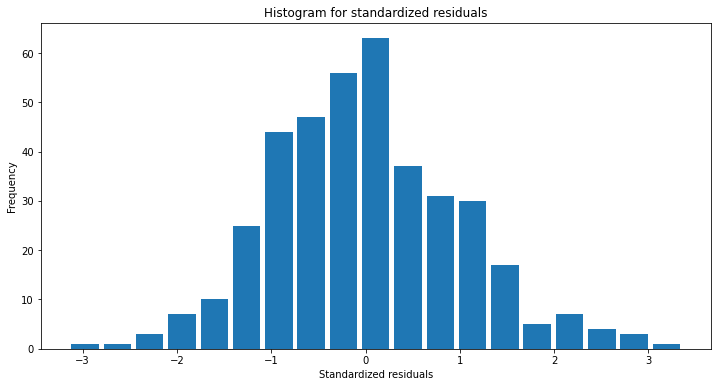

In [84]:
from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

In [14]:
#3

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,acceleration,weight,name
0,18.0,8,307.0,130,12.0,3504,chevrolet chevelle malibu
1,15.0,8,350.0,165,11.5,3693,buick skylark 320
2,18.0,8,318.0,150,11.0,3436,plymouth satellite
3,16.0,8,304.0,150,12.0,3433,amc rebel sst
4,17.0,8,302.0,140,10.5,3449,ford torino


In [41]:
mpg = np.log(df.iloc[:,0:1])
mpg = mpg.rename(columns={"mpg": "Log_mpg"})

data = pd.concat([mpg, df.iloc[:,1:]], axis=1)
data

,Log_mpg,cylinders,displacement,horsepower,acceleration,weight,name
0,2.890372,8,307.0,130,12.0,3504,chevrolet chevelle malibu
1,2.708050,8,350.0,165,11.5,3693,buick skylark 320
2,2.890372,8,318.0,150,11.0,3436,plymouth satellite
3,2.772589,8,304.0,150,12.0,3433,amc rebel sst
4,2.833213,8,302.0,140,10.5,3449,ford torino
...,...,...,...,...,...,...,...
387,3.295837,4,140.0,86,15.6,2790,ford mustang gl
388,3.784190,4,97.0,52,24.6,2130,vw pickup
389,3.465736,4,135.0,84,11.6,2295,dodge rampage
390,3.332205,4,120.0,79,18.6,2625,ford ranger


In [85]:
ols = sm.OLS(data['Log_mpg'], sm.add_constant(data.iloc[:, 1:6]))
lm2 = ols.fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_mpg   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     292.9
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          6.18e-129
Time:                        20:40:20   Log-Likelihood:                 174.31
No. Observations:                 392   AIC:                            -336.6
Df Residuals:                     386   BIC:                            -312.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.2203      0.098     42.956   

Text(0, 0.5, 'Residuals')

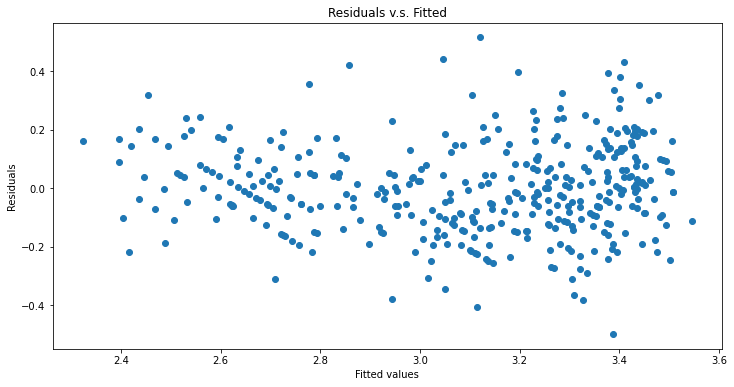

In [86]:
fitted_y = lm2.fittedvalues
residual = lm2.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title('Residuals v.s. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

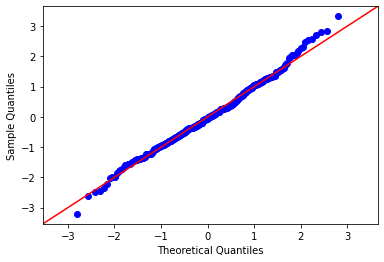

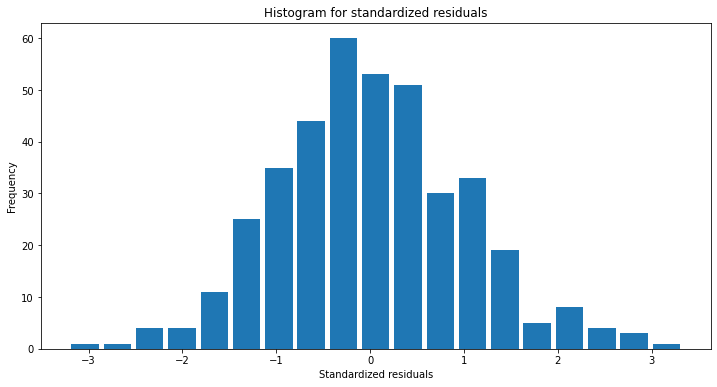

In [87]:
from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

In [47]:
# 4

In [88]:
ols = sm.OLS(data['Log_mpg'], sm.add_constant(data_log.iloc[:, 1:6]))
lm3 = ols.fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_mpg   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     292.9
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          6.18e-129
Time:                        20:40:34   Log-Likelihood:                 174.31
No. Observations:                 392   AIC:                            -336.6
Df Residuals:                     386   BIC:                            -312.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.2203      0.098     42.956   

Text(0, 0.5, 'Residuals')

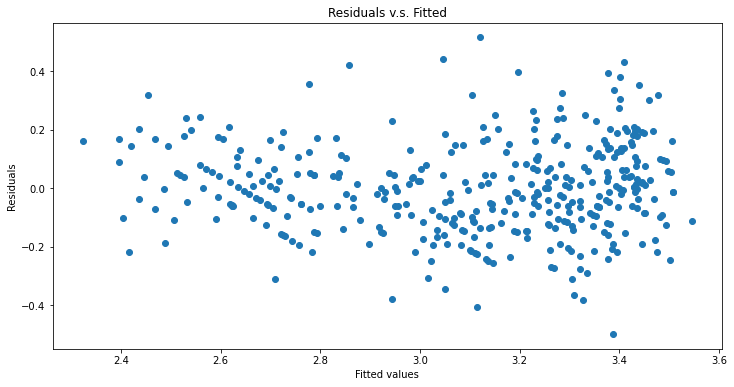

In [89]:
fitted_y = lm3.fittedvalues
residual = lm3.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title('Residuals v.s. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

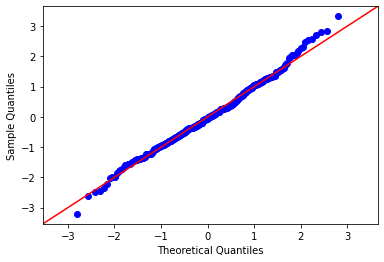

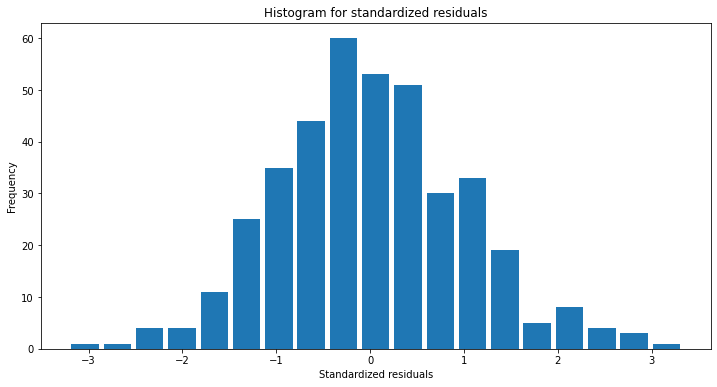

In [90]:
from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

In [62]:
# 6

In [75]:
import scipy.stats as stats
Z, fit_lambda = stats.boxcox(df.mpg)
print(fit_lambda)

0.19123083616287737


In [91]:
ols = sm.OLS(Z, sm.add_constant(data_log.iloc[:, 1:6]))
lm4 = ols.fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     272.1
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          4.17e-124
Time:                        20:41:07   Log-Likelihood:                -68.433
No. Observations:                 392   AIC:                             148.9
Df Residuals:                     386   BIC:                             172.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2307      0.182     34.141   

Text(0, 0.5, 'Residuals')

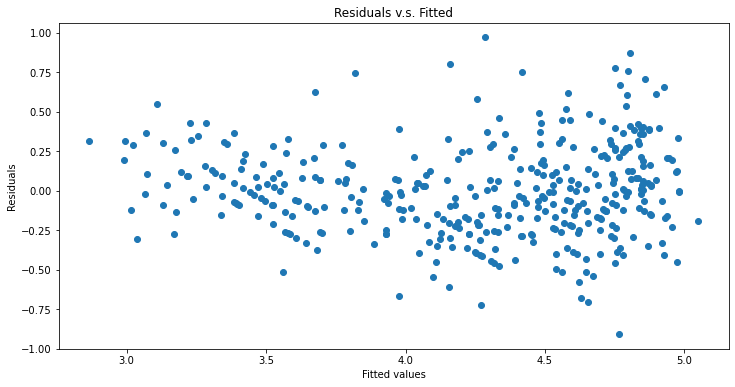

In [92]:
fitted_y = lm4.fittedvalues
residual = lm4.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title('Residuals v.s. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

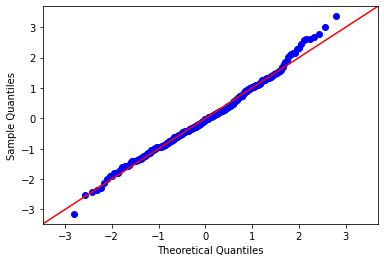

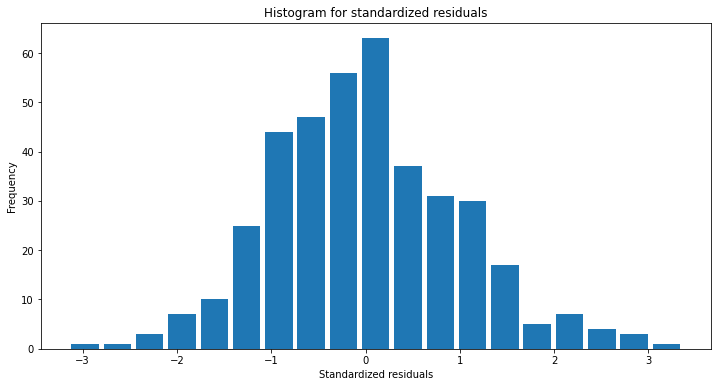

In [93]:
from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')